# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [31]:
#  1. Get the total rides for each city type
total_ride_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [32]:
# 2. Get the total drivers for each city type
total_drivers_by_city = city_data_df.groupby(['type']).sum()["driver_count"]
total_drivers_by_city


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [33]:
#  3. Get the total amount of fares for each city type
total_fares_by_city= pyber_data_df.groupby(['type']).sum()['fare']
total_fares_by_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [34]:
#  4. Get the average fare per ride for each city type. 
avg_fare_type = pyber_data_df.groupby(['type']).mean()['fare']
avg_fare_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [35]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares_by_city/total_drivers_by_city
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [36]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df =pd.DataFrame({
    "Total Rides": total_ride_by_type,
    "Total Drivers": total_drivers_by_city,
    "Total Fares": total_fares_by_city,
    "Average Fare by Ride": avg_fare_type,
    "Average Fare by Driver": avg_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare by Ride,Average Fare by Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [37]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [38]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.1f}".format) 
pyber_summary_df["Average Fare by Ride"] = pyber_summary_df["Average Fare by Ride"].map("{:.1f}".format)
pyber_summary_df["Average Fare by Driver"] = pyber_summary_df["Average Fare by Driver"].map("{:.1f}".format) 
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare by Ride,Average Fare by Driver
Rural,125,78,"$4,327.9",34.6,55.5
Suburban,625,490,"$19,356.3",31.0,39.5
Urban,1625,2405,"$39,854.4",24.5,16.6


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [45]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [46]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
dates_type = pyber_data_df.groupby(['date','type']).sum() ['fare']
dates_type


date            type    
1/1/2019 0:08   Urban       37.91
1/1/2019 0:46   Suburban    47.74
1/1/2019 12:32  Suburban    25.56
1/1/2019 14:40  Urban        5.42
1/1/2019 14:42  Urban       12.31
                            ...  
5/8/2019 1:54   Urban       32.69
5/8/2019 2:31   Urban       41.33
5/8/2019 4:20   Urban       21.99
5/8/2019 4:39   Urban       18.45
5/8/2019 7:29   Urban       18.55
Name: fare, Length: 2364, dtype: float64

In [47]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
dates_type = dates_type.reset_index()
dates_type['date'] =pd.to_datetime(dates_type['date'])
#dates_type.info()
#dates_type['date1'] = dates_type['date'].dt.strftime('%m/%d/%Y')
dates_type

,date,type,fare
0,2019-01-01 00:08:00,Urban,37.91
1,2019-01-01 00:46:00,Suburban,47.74
2,2019-01-01 12:32:00,Suburban,25.56
3,2019-01-01 14:40:00,Urban,5.42
4,2019-01-01 14:42:00,Urban,12.31
...,...,...,...
2359,2019-05-08 01:54:00,Urban,32.69
2360,2019-05-08 02:31:00,Urban,41.33
2361,2019-05-08 04:20:00,Urban,21.99
2362,2019-05-08 04:39:00,Urban,18.45


In [49]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

date_pivot_table =pd.pivot_table(dates_type, values= 'fare', index = 'date', columns = 'type')
date_pivot_table



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [50]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
loc_pivot = date_pivot_table['2019-01-01':'2019-04-29']
loc_pivot


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:00,NaN,NaN,28.41
2019-04-29 21:20:00,NaN,NaN,13.59
2019-04-29 22:08:00,NaN,25.75,NaN


In [51]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
loc_pivot.index = pd.to_datetime(loc_pivot.index)
# df.index = pd.to_datetime(df.index)

In [52]:
# 7. Check that the datatype for the index is datetime using df.info()
loc_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-29 23:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [53]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
loc_pivot_res = loc_pivot.resample('W').sum()
loc_pivot_res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2019-01-06 to 2019-05-05
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     18 non-null     float64
 1   Suburban  18 non-null     float64
 2   Urban     18 non-null     float64
dtypes: float64(3)
memory usage: 576.0 bytes


In [54]:
loc_pivot_res

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


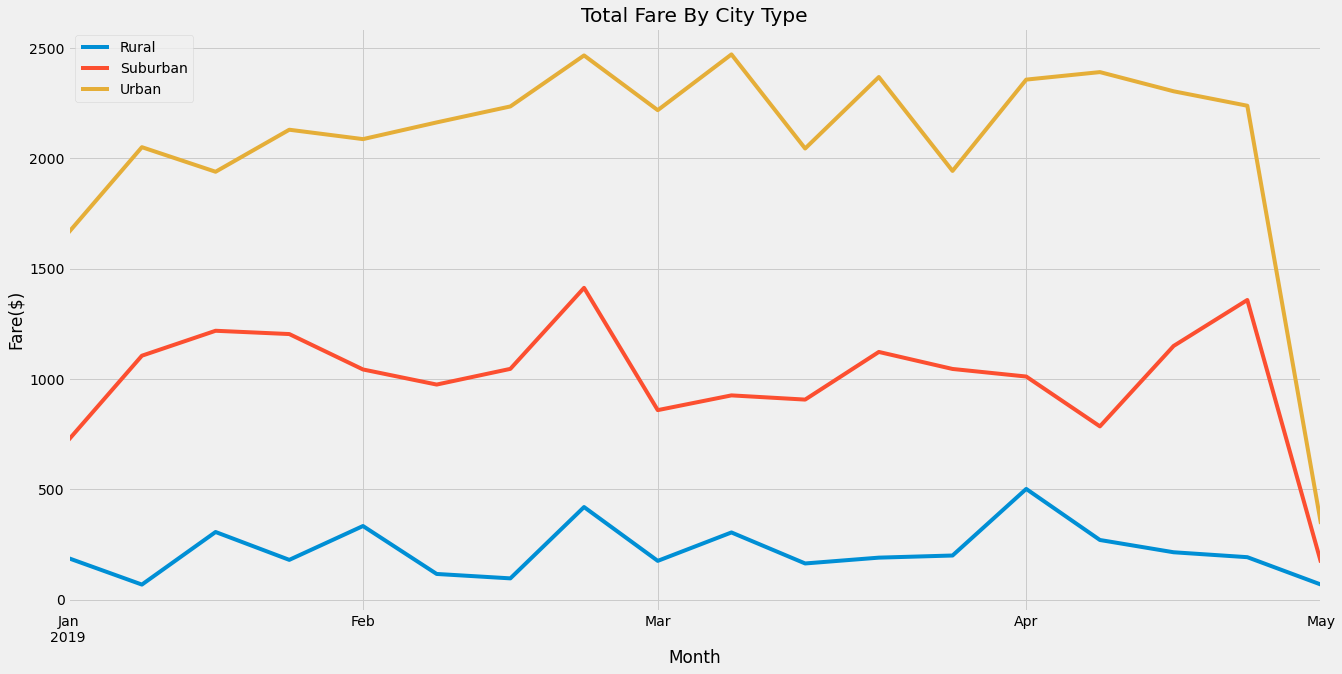

In [59]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
loc_pivot_res.plot(figsize = (20,10))
plt.ylabel('Fare($)')
plt.xlabel('Month')
plt.title('Total Fare By City Type')

plt.savefig('Analysis/PyBer_fare_summary.png')
plt.legend()
